In [4]:
import numpy as np

In [5]:
def file2array(filename):
    file = open(filename)
    file_lines = file.readlines()
    numberOfLines = len(file_lines)
    dataArray = np.zeros((numberOfLines, 3))
    labels = []
    index = 0
    for line in file_lines:
        line = line.strip() # 参数为空时，默认删除开头、结尾处空白符（包括'\n', '\r',  '\t',  ' ')
        formLine = line.split('\t')
        dataArray[index,:] = formLine[0:3]
        labels.append((formLine[-1]))
        index += 1
    label_id = []
    dic = {}
    index = 1
    for i in range(len(labels)):
        x = dic.get(labels[i], -1)
        label_id.append(x)
        if (label_id[i] == -1):
            label_id[i] = index
            dic[labels[i]] = index
            index += 1
    return dataArray, label_id

In [7]:
data, labels = file2array('datingTestSet.txt')
data[0:20, :], labels[0:20]

(array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
        [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
        [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
        [7.5136000e+04, 1.3147394e+01, 4.2896400e-01],
        [3.8344000e+04, 1.6697880e+00, 1.3429600e-01],
        [7.2993000e+04, 1.0141740e+01, 1.0329550e+00],
        [3.5948000e+04, 6.8307920e+00, 1.2131920e+00],
        [4.2666000e+04, 1.3276369e+01, 5.4388000e-01],
        [6.7497000e+04, 8.6315770e+00, 7.4927800e-01],
        [3.5483000e+04, 1.2273169e+01, 1.5080530e+00],
        [5.0242000e+04, 3.7234980e+00, 8.3191700e-01],
        [6.3275000e+04, 8.3858790e+00, 1.6694850e+00],
        [5.5690000e+03, 4.8754350e+00, 7.2865800e-01],
        [5.1052000e+04, 4.6800980e+00, 6.2522400e-01],
        [7.7372000e+04, 1.5299570e+01, 3.3135100e-01],
        [4.3673000e+04, 1.8894610e+00, 1.9128300e-01],
        [6.1364000e+04, 7.5167540e+00, 1.2691640e+00],
        [6.9673000e+04, 1.4239195e+01, 2.6133300e-01],
        [1

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

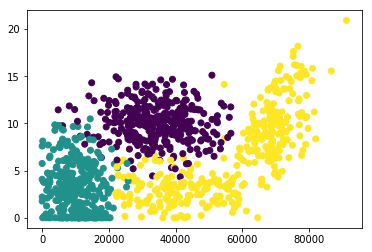

In [15]:
plt.scatter(data[:,0], data[:,1], c=15*np.array(labels))

下面是对一个散点图（多种散点）进行显示legend的函数。
思路是把三种不同标签的图分开，分成三个子图，画在一张图里面。

In [46]:
def scatterLegend(data, labels, x, y):
    type1 = []
    type2 = []
    type3 = []
    for i in range(len(labels)):
        if labels[i] == 1:
            type1.append(np.array(data[i]))
        elif labels[i] == 2:
            type2.append(np.array(data[i]))
        else:
            type3.append(np.array(data[i]))
    type1 = np.array(type1)
    type2 = np.array(type2)
    type3 = np.array(type3)
    g1 = plt.scatter(type1[:, x], type1[:, y], c='red')
    g2 = plt.scatter(type2[:, x], type2[:, y], c='yellow')
    g3 = plt.scatter(type3[:, x], type3[:, y], c='blue')
    plt.legend(handles=[g1, g2, g3], labels=['not at all', 'a small doses', 'a large doses'])

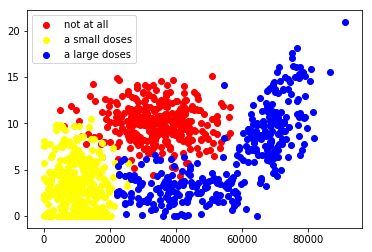

In [47]:
scatterLegend(data, labels, 0, 1)

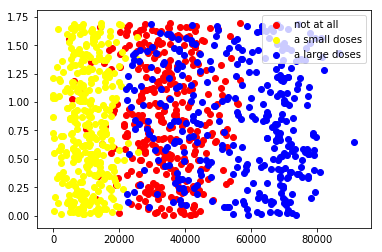

In [48]:
scatterLegend(data, labels, 0, 2)

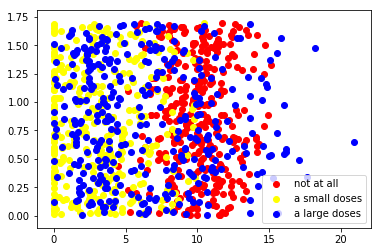

In [49]:
scatterLegend(data, labels, 1, 2)